In [2]:
#pip install --user logomaker #uncomment if logomaker is not currently installed.
import logomaker
print(logomaker)
import matplotlib.pyplot as plt

<module 'logomaker' from '/home/blacksmi/.local/lib/python3.9/site-packages/logomaker/__init__.py'>


In [6]:
#Actual code here:
import sys
import pandas as pd
def process_locus_info(locus_info):
    #print(locus_info)
    locus_dict = {}
    
    locus_dict["chromosome"] = locus_info[0]
    locus_dict["start"] = int(locus_info[1])
    locus_dict["end"] = int(locus_info[2])
    locus_dict["orientation"] = locus_info[3]
    locus_dict["parent_gene"] = locus_info[4]
    locus_dict["poly_a_coords"] = locus_info[5]
    locus_dict["poly_a_seq"] = locus_info[6]
    locus_dict["left_TSD_coords"] = locus_info[7]
    locus_dict["left_TSD_seq"] = locus_info[8]
    locus_dict["right_TSD_coords"] = locus_info[9]
    locus_dict["right_TSD_seq"] = locus_info[10]
    locus_dict["endo_site"] = locus_info[12]
    
    return locus_dict
    
#First, extract the locus information:
def generate_logoplot(infile_name, sample_name,datatype=["Standard"]):
    endo_cut_site = []
    pdf_prefix = infile_name.split("/")[0:-1]
    pdf_prefix = "/".join(pdf_prefix)
    
    with open(infile_name, 'rt') as infile:
        for line in infile:
            line = line.rstrip().split()
            line_dict = process_locus_info(line)
            if line_dict["endo_site"] == "N/A":
                continue
            if "Standard" in datatype:
                    pass
            if "Long_TSD" in datatype:
                if len(line_dict["right_TSD_seq"]) < 10 or len(line_dict["left_TSD_seq"]) < 10:
                    continue
            if "Both_Hallmarks" in datatype or "Agree" in datatype:
                if line_dict["right_TSD_seq"] == "N/A" or line_dict["poly_a_seq"] == "N/A":
                    continue
            if "Agree" in datatype:
                if line_dict["orientation"]  == "+":
                    poly_a_end = int(line_dict["poly_a_coords"].split("-")[1])
                    TSD_start = int(line_dict["right_TSD_coords"].split("-")[0].split(":")[1])
                    dist = TSD_start - poly_a_end -1
                elif line_dict["orientation"]  == "-":
                    poly_a_start = int(line_dict["poly_a_coords"].split("-")[0].split(":")[1])
                    TSD_end = int(line_dict["left_TSD_coords"].split("-")[1])
                    dist = poly_a_start - TSD_end -1
                if dist > 5:
                    continue
            endo_cut_site.append(line[-1])
    endo_dict = {}
    for i in range(len(endo_cut_site[0])):
        endo_dict[i] = {"A":0,"T":0,"C":0,"G":0}
    for cut_site in endo_cut_site:
        cut_site = cut_site.upper()
        for i in range(len(cut_site)):
            endo_dict[i][cut_site[i]] +=1
            if endo_dict[i][cut_site[i]] == "N":
                sys.exit()
    for key in endo_dict.keys():
        for key2 in endo_dict[key].keys():
            endo_dict[key][key2] = endo_dict[key][key2]/len(endo_cut_site)
    endo_dict
    endo_pd = pd.DataFrame(endo_dict)
    endo_pd = endo_pd.T
    print(endo_pd)
    print(len(endo_cut_site))
    
    # create Logo object
    ss_logo = logomaker.Logo(endo_pd,
    width=.8,
    vpad=.05,
    stack_order='big_on_top',
    color_scheme='classic')
    # style using Logo methods
    ss_logo.style_spines(spines=['left', 'right'], visible=False)
    # style using Axes methods
    ss_logo.ax.set_xticks(range(len(endo_pd)))
    ss_logo.ax.set_xticklabels('%+d'%x for x in [-5, -4, -3, -2, -1, +1, +2])
    ss_logo.ax.set_yticks([0,.2,.4,.6,.8, 1])
    ss_logo.ax.axvline(4.5, color='k', linewidth=1, linestyle=':')
    ss_logo.ax.set_ylabel('Probability',fontsize=12)
    if datatype[0] == "Standard" and len(datatype) == 1:
        output_type = '5bp TSD'
    elif datatype[0] == "Long_TSD" and len(datatype) == 1:
        output_type = "10bp TSD"
    elif datatype[0] == "Both_Hallmarks" and len(datatype) == 1:
        output_type = "5bp TSD and 5bp Poly(a)"
    elif datatype[0] == "Long_TSD" and datatype[1] == "Both_Hallmarks":
        output_type = "10bp TSD and 5bp Poly(a)" 
    elif datatype[0] == "Agree" and len(datatype) == 1:
        output_type = "5bp TSD 5bp and Poly(a), adjacent" 
    elif datatype[0] == "Agree" and datatype[1] == "Long_TSD":
        output_type = "10bp TSD and 5bp Poly(a), adjacent" 

    ss_logo.ax.set_title(f'Hallmark requirements: {output_type}',fontsize=15)
    ss_logo.ax.set_xlabel(f'Position in motif',fontsize=12)
    output_type = output_type.replace(",","").replace(" ","_")
    #plt.savefig(f'{pdf_prefix}/{sample}_{output_type}_logo_{len(endo_cut_site)}.pdf',dpi=300,bbox_inches='tight')  
    plt.show()

          A         T         C         G
0  0.249104  0.453405  0.171446  0.126045
1  0.199522  0.530167  0.145161  0.125149
2  0.175329  0.552867  0.171147  0.100657
3  0.178614  0.567503  0.160096  0.093787
4  0.221625  0.556153  0.114098  0.108124
5  0.399343  0.202808  0.175030  0.222820
6  0.388889  0.339904  0.141278  0.129928
3348


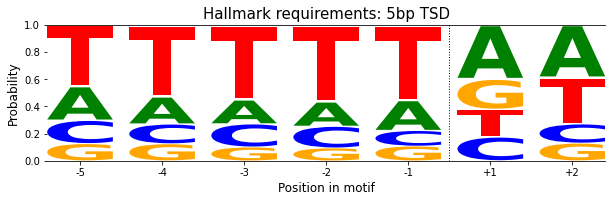

          A         T         C         G
0  0.220433  0.534985  0.149845  0.094737
1  0.150464  0.692879  0.098452  0.058204
2  0.095356  0.708978  0.152941  0.042724
3  0.081115  0.769659  0.123220  0.026006
4  0.167802  0.731269  0.069969  0.030960
5  0.524458  0.159752  0.117028  0.198762
6  0.492879  0.359752  0.081734  0.065635
1615


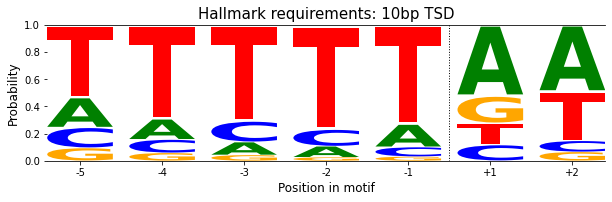

          A         T         C         G
0  0.250892  0.457420  0.170831  0.120857
1  0.193269  0.568078  0.136665  0.101989
2  0.151963  0.585416  0.175931  0.086690
3  0.156043  0.602244  0.165222  0.076492
4  0.225905  0.574197  0.109638  0.090260
5  0.441101  0.163692  0.168281  0.226925
6  0.417644  0.341152  0.121367  0.119837
1961


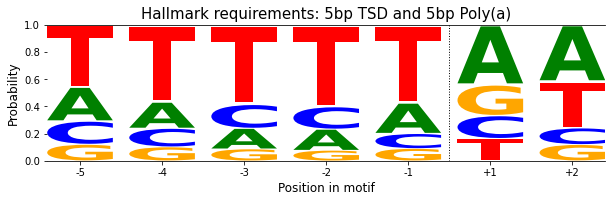

          A         T         C         G
0  0.220238  0.515306  0.164966  0.099490
1  0.157313  0.684524  0.102891  0.055272
2  0.089286  0.697279  0.170918  0.042517
3  0.082483  0.745748  0.144558  0.027211
4  0.197279  0.684524  0.082483  0.035714
5  0.543367  0.130102  0.117347  0.209184
6  0.500850  0.360544  0.071429  0.067177
1176


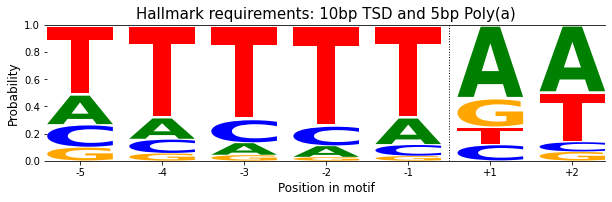

          A         T         C         G
0  0.224894  0.509194  0.162659  0.103253
1  0.165488  0.649222  0.118812  0.066478
2  0.117397  0.685997  0.155587  0.041018
3  0.089109  0.735502  0.134371  0.041018
4  0.195191  0.678925  0.079208  0.046676
5  0.541726  0.114569  0.135785  0.207921
6  0.479491  0.357850  0.091938  0.070721
707


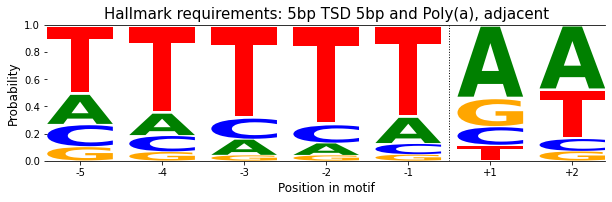

          A         T         C         G
0  0.217469  0.527629  0.160428  0.094474
1  0.155080  0.686275  0.105169  0.053476
2  0.096257  0.720143  0.156863  0.026738
3  0.062389  0.784314  0.131907  0.021390
4  0.204991  0.693405  0.073084  0.028520
5  0.577540  0.105169  0.112299  0.204991
6  0.518717  0.351159  0.071301  0.058824
561


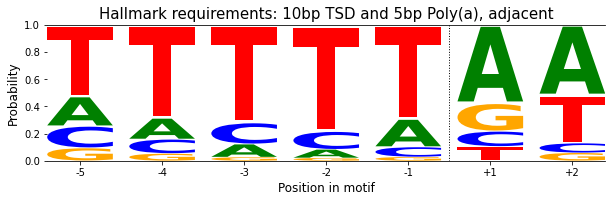

          A         T         C         G
0  0.255172  0.454573  0.166717  0.123538
1  0.202999  0.528636  0.141829  0.126537
2  0.184408  0.545427  0.171814  0.098351
3  0.180810  0.565217  0.157721  0.096252
4  0.224888  0.557721  0.112444  0.104948
5  0.413493  0.193703  0.175712  0.217091
6  0.386807  0.342129  0.134933  0.136132
3335


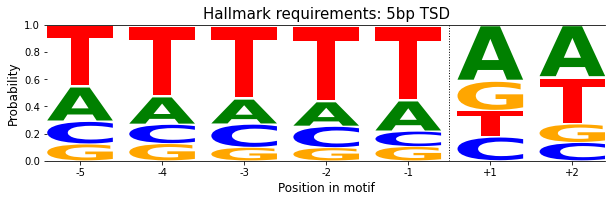

          A         T         C         G
0  0.222222  0.536420  0.150617  0.090741
1  0.151235  0.694444  0.098148  0.056173
2  0.100000  0.708642  0.150000  0.041358
3  0.085185  0.769136  0.117901  0.027778
4  0.176543  0.722840  0.066667  0.033951
5  0.541358  0.147531  0.120370  0.190741
6  0.491358  0.360494  0.077778  0.070370
1620


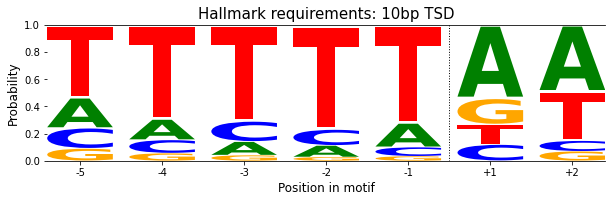

          A         T         C         G
0  0.251277  0.466803  0.165475  0.116445
1  0.191011  0.579162  0.133299  0.096527
2  0.158836  0.580695  0.181818  0.078652
3  0.155260  0.604699  0.166496  0.073544
4  0.228805  0.583759  0.102145  0.085291
5  0.462717  0.157303  0.163432  0.216547
6  0.417263  0.341675  0.124106  0.116956
1958


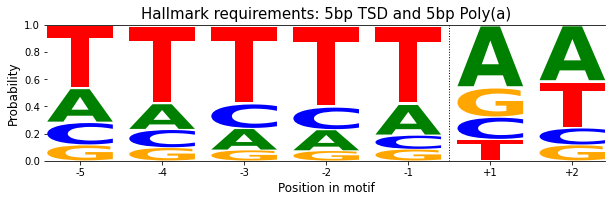

          A         T         C         G
0  0.225671  0.519295  0.160235  0.094799
1  0.155201  0.689597  0.100671  0.054530
2  0.095638  0.695470  0.167785  0.041107
3  0.082215  0.745805  0.142617  0.029362
4  0.205537  0.679530  0.078020  0.036913
5  0.560403  0.123322  0.117450  0.198826
6  0.500000  0.356544  0.074664  0.068792
1192


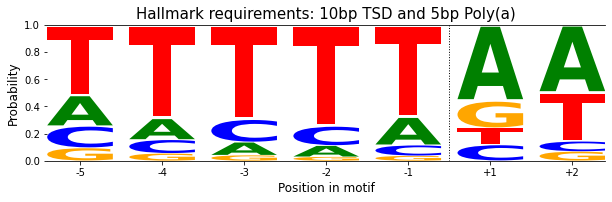

          A         T         C         G
0  0.221870  0.524564  0.167987  0.085578
1  0.147385  0.686212  0.104596  0.061807
2  0.112520  0.656101  0.177496  0.053883
3  0.093502  0.716323  0.150555  0.039620
4  0.187005  0.690967  0.074485  0.047544
5  0.529319  0.114105  0.141046  0.215531
6  0.478605  0.345483  0.093502  0.082409
631


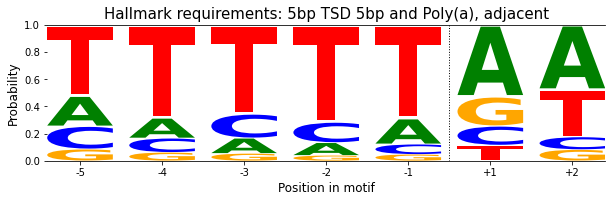

          A         T         C         G
0  0.234469  0.515030  0.166333  0.084168
1  0.136273  0.723447  0.092184  0.048096
2  0.106212  0.673347  0.182365  0.038076
3  0.068136  0.757515  0.148297  0.026052
4  0.184369  0.709419  0.074148  0.032064
5  0.571142  0.110220  0.112224  0.206413
6  0.523046  0.344689  0.072144  0.060120
499


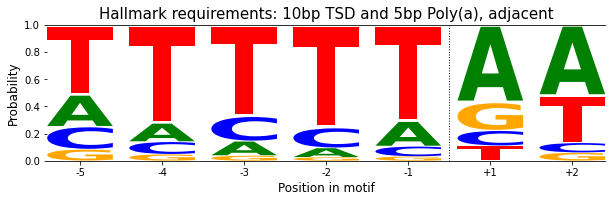

          A         T         C         G
0  0.250812  0.449631  0.173117  0.126440
1  0.201773  0.528508  0.145643  0.124077
2  0.177843  0.544165  0.175480  0.102511
3  0.181979  0.568685  0.155982  0.093353
4  0.221270  0.549483  0.115510  0.113737
5  0.397932  0.201477  0.175775  0.224815
6  0.381388  0.344461  0.143575  0.130576
3385


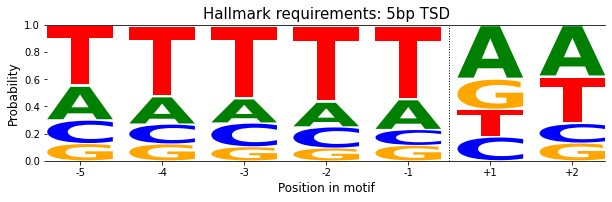

          A         T         C         G
0  0.219347  0.529883  0.154652  0.096118
1  0.148490  0.696242  0.099199  0.056069
2  0.096734  0.704251  0.152187  0.046827
3  0.081947  0.770795  0.121380  0.025878
4  0.173136  0.723968  0.071473  0.031423
5  0.521873  0.160197  0.119532  0.198398
6  0.482440  0.363524  0.085644  0.068392
1623


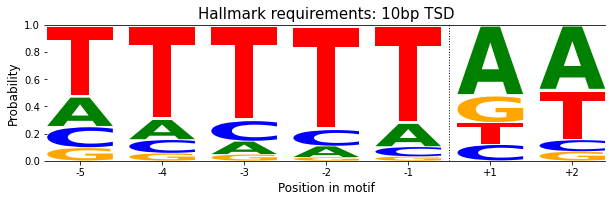

          A         T         C         G
0  0.252024  0.453441  0.171053  0.123482
1  0.191802  0.565789  0.141194  0.101215
2  0.157389  0.572874  0.183198  0.086538
3  0.157895  0.601721  0.165486  0.074899
4  0.229251  0.567814  0.108806  0.094130
5  0.435223  0.164474  0.172065  0.228239
6  0.413968  0.342105  0.125000  0.118927
1976


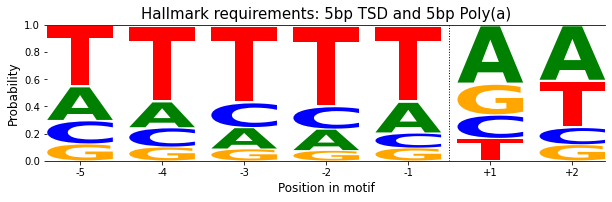

          A         T         C         G
0  0.221939  0.505952  0.169218  0.102891
1  0.157313  0.687075  0.102041  0.053571
2  0.091837  0.689626  0.171769  0.046769
3  0.083333  0.745748  0.143707  0.027211
4  0.203231  0.678571  0.083333  0.034864
5  0.536565  0.130102  0.121599  0.211735
6  0.492347  0.362245  0.076531  0.068878
1176


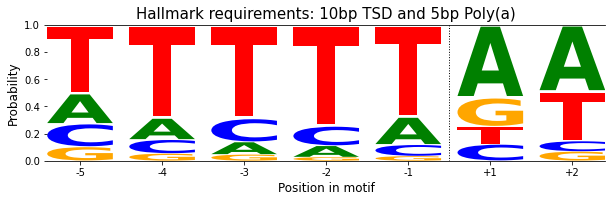

          A         T         C         G
0  0.224649  0.521061  0.149766  0.104524
1  0.174727  0.647426  0.121685  0.056162
2  0.123245  0.673947  0.162246  0.040562
3  0.107644  0.716069  0.137285  0.039002
4  0.196568  0.673947  0.085803  0.043682
5  0.527301  0.120125  0.135725  0.216849
6  0.472699  0.361934  0.096724  0.068643
641


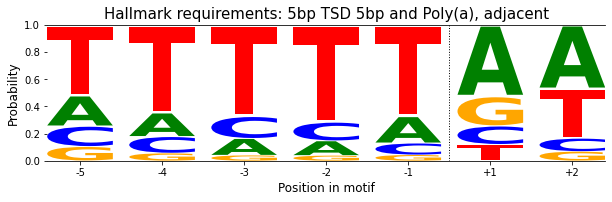

          A         T         C         G
0  0.212551  0.536437  0.151822  0.099190
1  0.168016  0.686235  0.105263  0.040486
2  0.099190  0.704453  0.163968  0.032389
3  0.074899  0.773279  0.131579  0.020243
4  0.202429  0.688259  0.080972  0.028340
5  0.560729  0.111336  0.115385  0.212551
6  0.510121  0.358300  0.076923  0.054656
494


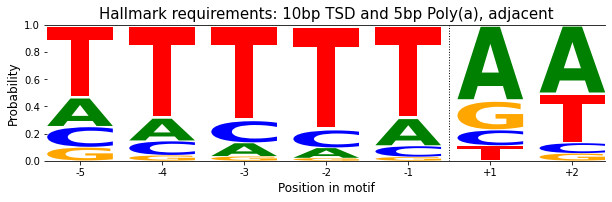

          A         T         C         G
0  0.249086  0.456456  0.171437  0.123021
1  0.201279  0.532582  0.142814  0.123325
2  0.178136  0.548417  0.175700  0.097747
3  0.182704  0.565469  0.158648  0.093179
4  0.223508  0.555725  0.113276  0.107491
5  0.402558  0.201279  0.176005  0.220158
6  0.386419  0.341961  0.141291  0.130329
3284


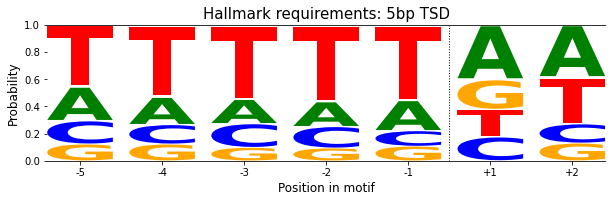

          A         T         C         G
0  0.219282  0.533711  0.149338  0.097669
1  0.149338  0.694392  0.097669  0.058601
2  0.097038  0.704474  0.153119  0.045369
3  0.084436  0.766226  0.123503  0.025835
4  0.173283  0.725268  0.070573  0.030876
5  0.524260  0.158160  0.117202  0.200378
6  0.487713  0.359168  0.082546  0.070573
1587


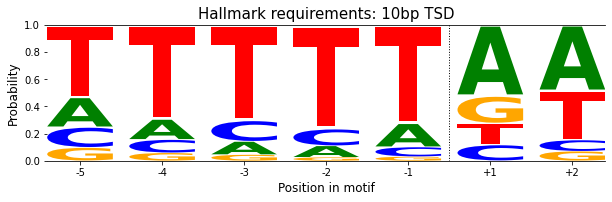

          A         T         C         G
0  0.252192  0.464157  0.168644  0.115008
1  0.192367  0.569366  0.138731  0.099536
2  0.158329  0.576586  0.183600  0.081485
3  0.160392  0.597215  0.167096  0.075297
4  0.230015  0.575039  0.106240  0.088706
5  0.443012  0.167612  0.165549  0.223827
6  0.416194  0.341413  0.123259  0.119134
1939


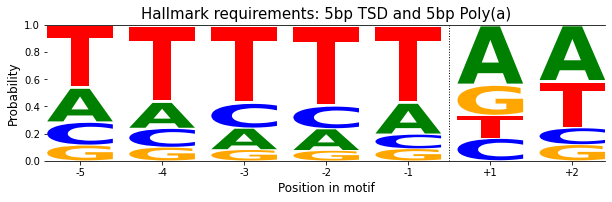

          A         T         C         G
0  0.220880  0.514236  0.163934  0.100949
1  0.156169  0.686799  0.101812  0.055220
2  0.092321  0.690250  0.174288  0.043141
3  0.082830  0.744607  0.144953  0.027610
4  0.201035  0.684211  0.081104  0.033650
5  0.540121  0.131148  0.118205  0.210526
6  0.497843  0.358930  0.075065  0.068162
1159


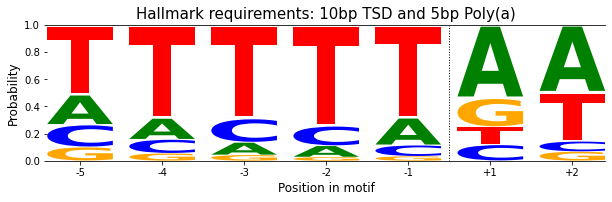

          A         T         C         G
0  0.222940  0.515347  0.155089  0.106624
1  0.187399  0.623586  0.116317  0.072698
2  0.124394  0.681745  0.153473  0.040388
3  0.103393  0.709208  0.143780  0.043619
4  0.187399  0.683360  0.085622  0.043619
5  0.516963  0.126010  0.151858  0.205170
6  0.478191  0.360258  0.088853  0.072698
619


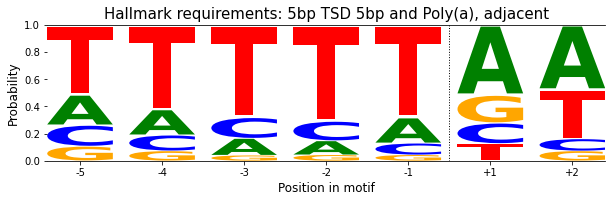

          A         T         C         G
0  0.219665  0.529289  0.154812  0.096234
1  0.175732  0.673640  0.100418  0.050209
2  0.102510  0.709205  0.156904  0.031381
3  0.071130  0.767782  0.138075  0.023013
4  0.194561  0.694561  0.081590  0.029289
5  0.546025  0.119247  0.129707  0.205021
6  0.518828  0.349372  0.073222  0.058577
478


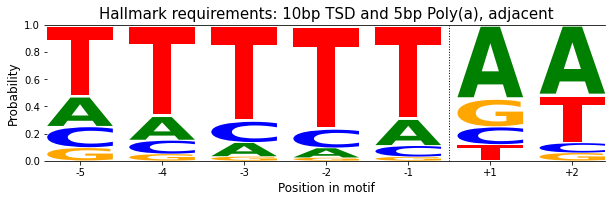

          A         T         C         G
0  0.251346  0.453920  0.172651  0.122083
1  0.197786  0.534411  0.143028  0.124776
2  0.175643  0.549372  0.174746  0.100239
3  0.176242  0.570916  0.159186  0.093656
4  0.223818  0.551765  0.115200  0.109216
5  0.406044  0.194195  0.179533  0.220227
6  0.389587  0.338719  0.140036  0.131658
3342


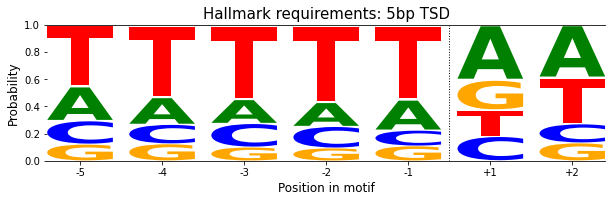

          A         T         C         G
0  0.224414  0.536375  0.147349  0.091862
1  0.147965  0.695438  0.098644  0.057953
2  0.097411  0.708385  0.151048  0.043157
3  0.075832  0.772503  0.124538  0.027127
4  0.173859  0.725031  0.070900  0.030210
5  0.530210  0.155364  0.119605  0.194821
6  0.493218  0.358816  0.079531  0.068434
1622


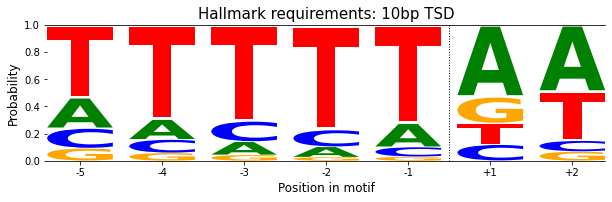

          A         T         C         G
0  0.252403  0.459282  0.170966  0.117350
1  0.189681  0.574102  0.136571  0.099646
2  0.158827  0.580172  0.176530  0.084471
3  0.150228  0.601922  0.170966  0.076884
4  0.227112  0.573596  0.109256  0.090035
5  0.450177  0.155286  0.171978  0.222559
6  0.422357  0.339403  0.122408  0.115832
1977


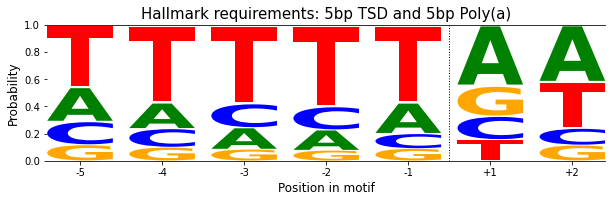

          A         T         C         G
0  0.229149  0.515586  0.161752  0.093513
1  0.151643  0.690817  0.101095  0.056445
2  0.091828  0.699242  0.167650  0.041281
3  0.071609  0.749789  0.148273  0.030329
4  0.203033  0.683235  0.083404  0.030329
5  0.547599  0.127211  0.119629  0.205560
6  0.502949  0.356361  0.073294  0.067397
1187


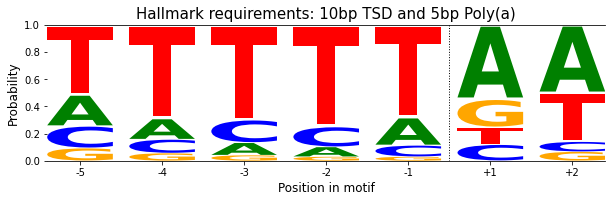

          A         T         C         G
0  0.222566  0.522411  0.154560  0.100464
1  0.173107  0.650696  0.114374  0.061824
2  0.123648  0.690881  0.145286  0.040185
3  0.094281  0.717156  0.143740  0.044822
4  0.199382  0.659969  0.091190  0.049459
5  0.544049  0.111283  0.140649  0.204019
6  0.488408  0.346213  0.092736  0.072643
647


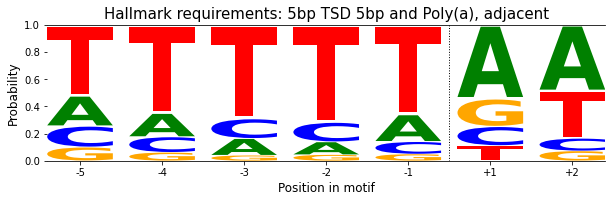

          A         T         C         G
0  0.228175  0.531746  0.150794  0.089286
1  0.162698  0.690476  0.097222  0.049603
2  0.101190  0.724206  0.142857  0.031746
3  0.063492  0.769841  0.138889  0.027778
4  0.204365  0.682540  0.085317  0.027778
5  0.571429  0.107143  0.121032  0.200397
6  0.529762  0.343254  0.071429  0.055556
504


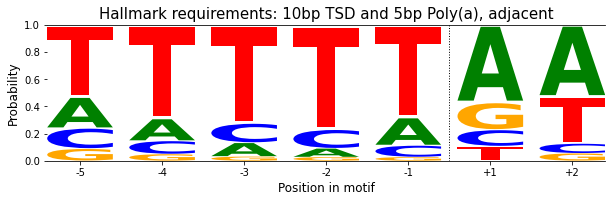

          A         T         C         G
0  0.247096  0.456829  0.174568  0.121507
1  0.197488  0.529670  0.148509  0.124333
2  0.185557  0.545683  0.170173  0.098587
3  0.181476  0.565463  0.159812  0.093250
4  0.223548  0.554788  0.108948  0.112716
5  0.400000  0.199686  0.181790  0.218524
6  0.387441  0.342857  0.135636  0.134066
3185


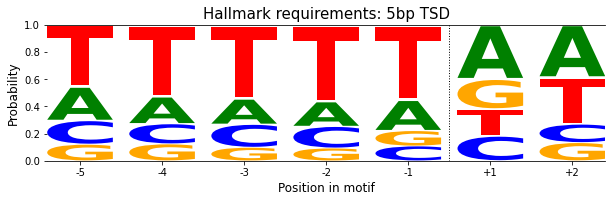

          A         T         C         G
0  0.224756  0.522476  0.160912  0.091857
1  0.148534  0.691857  0.102280  0.057329
2  0.107492  0.704886  0.145277  0.042345
3  0.079479  0.770033  0.123779  0.026710
4  0.171336  0.727036  0.069055  0.032573
5  0.525733  0.155049  0.123127  0.196091
6  0.484039  0.363518  0.081433  0.071010
1535


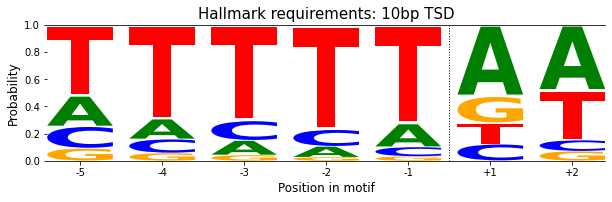

          A         T         C         G
0  0.252015  0.455132  0.176249  0.116604
1  0.185922  0.574422  0.138098  0.101558
2  0.163353  0.578721  0.174100  0.083826
3  0.157442  0.596454  0.169264  0.076840
4  0.230521  0.577109  0.102096  0.090274
5  0.441698  0.160666  0.173025  0.224610
6  0.415368  0.342826  0.119291  0.122515
1861


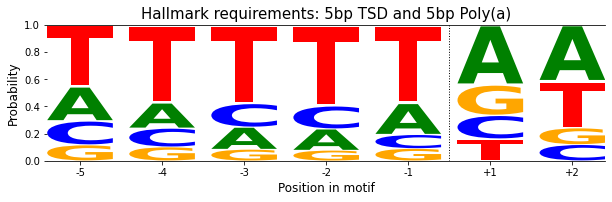

          A         T         C         G
0  0.226667  0.500444  0.176889  0.096000
1  0.153778  0.684444  0.104889  0.056889
2  0.101333  0.691556  0.163556  0.043556
3  0.077333  0.745778  0.147556  0.029333
4  0.201778  0.686222  0.080000  0.032000
5  0.541333  0.129778  0.121778  0.207111
6  0.496000  0.360889  0.073778  0.069333
1125


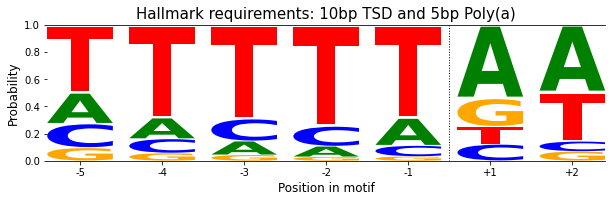

          A         T         C         G
0  0.230194  0.488789  0.171898  0.109118
1  0.173393  0.645740  0.116592  0.064275
2  0.125561  0.683109  0.150972  0.040359
3  0.083707  0.733931  0.134529  0.047833
4  0.206278  0.668161  0.074738  0.050822
5  0.544096  0.115097  0.133034  0.207773
6  0.482810  0.355755  0.091181  0.070254
669


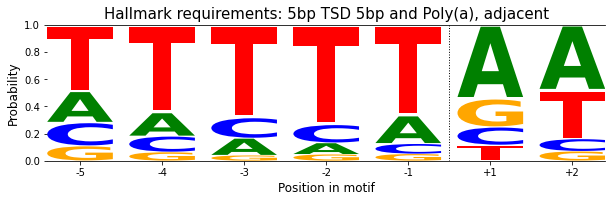

          A         T         C         G
0  0.227941  0.498162  0.174632  0.099265
1  0.159926  0.685662  0.101103  0.053309
2  0.106618  0.711397  0.150735  0.031250
3  0.060662  0.781250  0.130515  0.027574
4  0.216912  0.681985  0.068015  0.033088
5  0.571691  0.108456  0.113971  0.205882
6  0.518382  0.345588  0.077206  0.058824
544


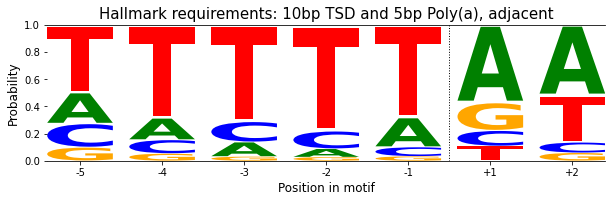

          A         T         C         G
0  0.242598  0.439669  0.186246  0.131487
1  0.201847  0.526902  0.144540  0.126711
2  0.169691  0.537727  0.182108  0.110474
3  0.174148  0.561605  0.166189  0.098058
4  0.224132  0.543776  0.119707  0.112385
5  0.383954  0.204075  0.189748  0.222222
6  0.369628  0.343521  0.147405  0.139446
3141


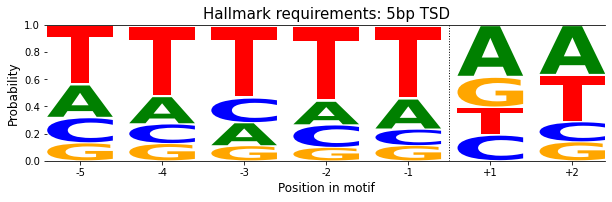

          A         T         C         G
0  0.213046  0.525330  0.167245  0.094379
1  0.149202  0.689799  0.099237  0.061763
2  0.097849  0.708536  0.151284  0.042332
3  0.082582  0.766829  0.124913  0.025677
4  0.172797  0.724497  0.072866  0.029840
5  0.518390  0.159611  0.124219  0.197779
6  0.476058  0.367800  0.085357  0.070784
1441


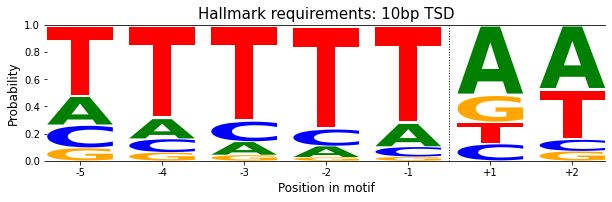

          A         T         C         G
0  0.243521  0.442765  0.190605  0.123110
1  0.192225  0.556695  0.143629  0.107451
2  0.156587  0.568575  0.180886  0.093952
3  0.158207  0.586393  0.177646  0.077754
4  0.235421  0.563715  0.110691  0.090173
5  0.419546  0.169546  0.183045  0.227862
6  0.396868  0.345572  0.131749  0.125810
1852


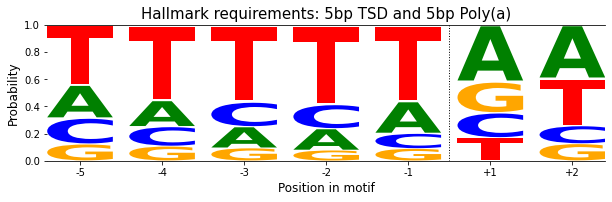

          A         T         C         G
0  0.216763  0.498073  0.185934  0.099229
1  0.157033  0.682081  0.104046  0.056840
2  0.090559  0.697495  0.166667  0.045279
3  0.086705  0.735067  0.150289  0.027938
4  0.202312  0.684971  0.080925  0.031792
5  0.534682  0.135838  0.125241  0.204239
6  0.485549  0.373796  0.073218  0.067437
1038


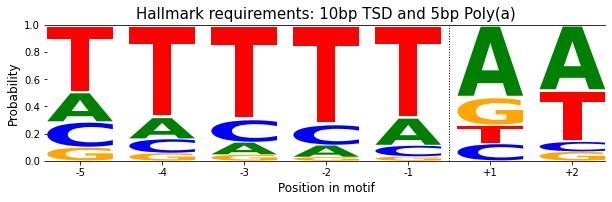

          A         T         C         G
0  0.213058  0.500000  0.164948  0.121993
1  0.180412  0.627148  0.123711  0.068729
2  0.118557  0.670103  0.164948  0.046392
3  0.104811  0.695876  0.149485  0.049828
4  0.197595  0.671821  0.091065  0.039519
5  0.508591  0.121993  0.161512  0.207904
6  0.450172  0.372852  0.103093  0.073883
582


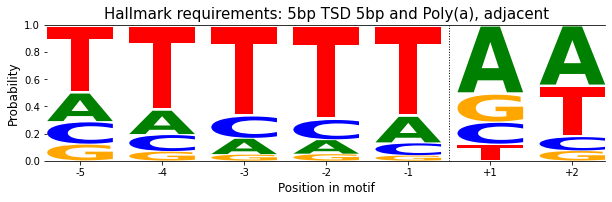

          A         T         C         G
0  0.204651  0.518605  0.167442  0.109302
1  0.172093  0.672093  0.109302  0.046512
2  0.086047  0.716279  0.165116  0.032558
3  0.074419  0.758140  0.141860  0.025581
4  0.200000  0.688372  0.086047  0.025581
5  0.567442  0.111628  0.125581  0.195349
6  0.497674  0.376744  0.069767  0.055814
430


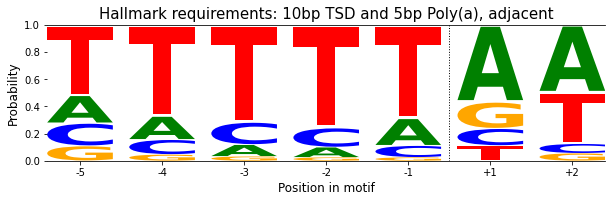

          A         T         C         G
0  0.251981  0.452932  0.168621  0.126466
1  0.201585  0.529952  0.142631  0.125832
2  0.175594  0.547702  0.173693  0.103011
3  0.180032  0.561648  0.161014  0.097306
4  0.227258  0.550238  0.112203  0.110301
5  0.406022  0.202219  0.175911  0.215848
6  0.383518  0.338827  0.142314  0.135341
3155


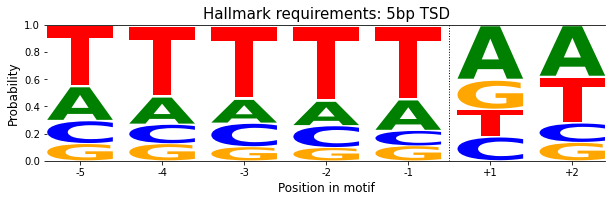

          A         T         C         G
0  0.217678  0.540237  0.144459  0.097625
1  0.149736  0.699208  0.093668  0.057388
2  0.096966  0.708443  0.151715  0.042876
3  0.086412  0.765172  0.121372  0.027045
4  0.168206  0.724274  0.073879  0.033641
5  0.526385  0.163588  0.117414  0.192612
6  0.484828  0.361478  0.080475  0.073219
1516


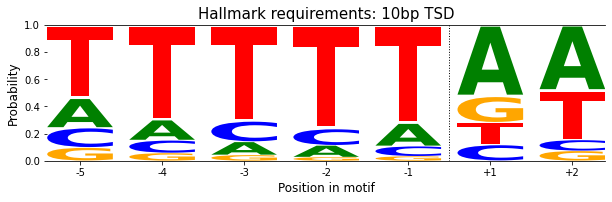

          A         T         C         G
0  0.253813  0.464597  0.160675  0.120915
1  0.192266  0.570261  0.140523  0.096950
2  0.155773  0.580610  0.182462  0.081155
3  0.155773  0.598039  0.168845  0.077342
4  0.230392  0.574074  0.107298  0.088235
5  0.448802  0.162854  0.172113  0.216231
6  0.414488  0.338235  0.127996  0.119281
1836


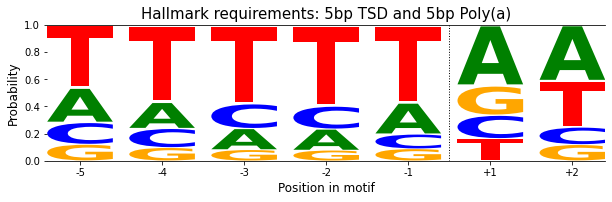

          A         T         C         G
0  0.224545  0.520000  0.154545  0.100909
1  0.154545  0.690909  0.099091  0.055455
2  0.092727  0.695455  0.170909  0.040909
3  0.084545  0.742727  0.143636  0.029091
4  0.198182  0.679091  0.087273  0.035455
5  0.544545  0.134545  0.117273  0.203636
6  0.498182  0.359091  0.072727  0.070000
1100


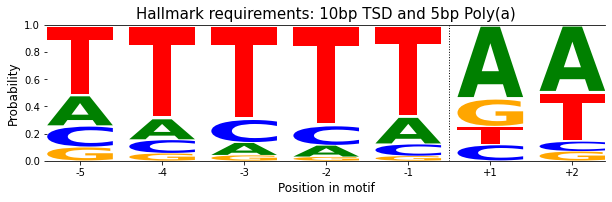

          A         T         C         G
0  0.216039  0.515548  0.162029  0.106383
1  0.180033  0.659574  0.099836  0.060556
2  0.117840  0.684124  0.163666  0.034370
3  0.098200  0.718494  0.140753  0.042553
4  0.201309  0.674304  0.078560  0.045827
5  0.545008  0.117840  0.148936  0.188216
6  0.482815  0.343699  0.096563  0.076923
611


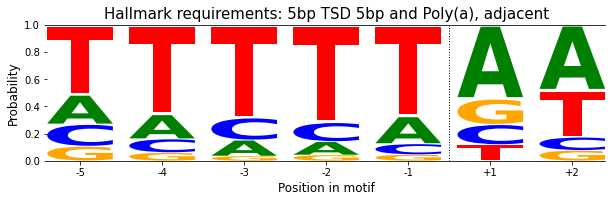

          A         T         C         G
0  0.218107  0.532922  0.158436  0.090535
1  0.166667  0.703704  0.082305  0.047325
2  0.092593  0.718107  0.162551  0.026749
3  0.063786  0.775720  0.133745  0.026749
4  0.209877  0.681070  0.076132  0.032922
5  0.586420  0.106996  0.117284  0.189300
6  0.518519  0.341564  0.072016  0.067901
486


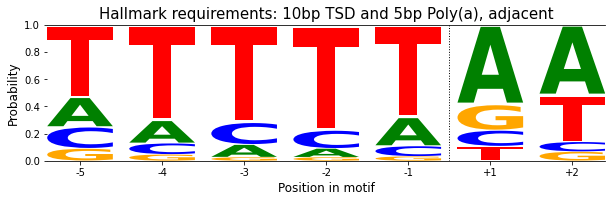

          A         T         C         G
0  0.248394  0.453656  0.173753  0.124197
1  0.197308  0.535944  0.144387  0.122362
2  0.174671  0.552157  0.170694  0.102478
3  0.174977  0.574794  0.156929  0.093301
4  0.219639  0.561028  0.113490  0.105843
5  0.405935  0.201897  0.170388  0.221780
6  0.386051  0.343836  0.137045  0.133068
3269


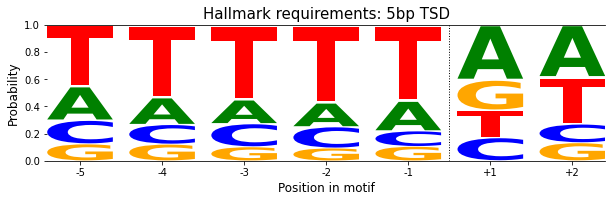

          A         T         C         G
0  0.219987  0.532370  0.153991  0.093652
1  0.145192  0.699560  0.098680  0.056568
2  0.091766  0.712759  0.151477  0.043997
3  0.077938  0.776241  0.121307  0.024513
4  0.167190  0.726587  0.072282  0.033941
5  0.527970  0.157134  0.116908  0.197989
6  0.487744  0.358265  0.081081  0.072910
1591


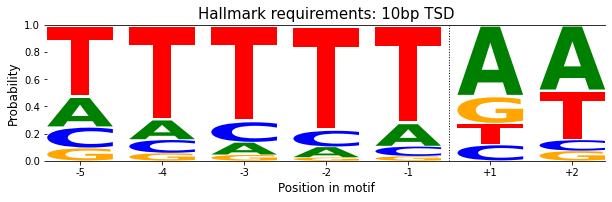

          A         T         C         G
0  0.249611  0.457187  0.171770  0.121432
1  0.187857  0.576544  0.136482  0.099118
2  0.155163  0.583809  0.177997  0.083031
3  0.154645  0.603529  0.168137  0.073690
4  0.225739  0.582252  0.107421  0.084587
5  0.445771  0.166061  0.163985  0.224183
6  0.411002  0.339907  0.123508  0.125584
1927


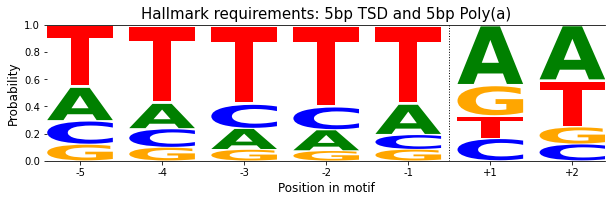

          A         T         C         G
0  0.223276  0.511207  0.165517  0.100000
1  0.150862  0.692241  0.101724  0.055172
2  0.088793  0.695690  0.172414  0.043103
3  0.077586  0.751724  0.143103  0.027586
4  0.195690  0.685345  0.084483  0.034483
5  0.548276  0.126724  0.118966  0.206034
6  0.493966  0.356034  0.076724  0.073276
1160


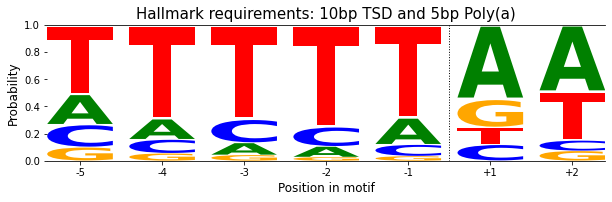

          A         T         C         G
0  0.223127  0.513029  0.153094  0.110749
1  0.184039  0.638436  0.115635  0.061889
2  0.122150  0.675896  0.164495  0.037459
3  0.099349  0.710098  0.148208  0.042345
4  0.182410  0.675896  0.096091  0.045603
5  0.532573  0.120521  0.135179  0.211726
6  0.473941  0.359935  0.092834  0.073290
614


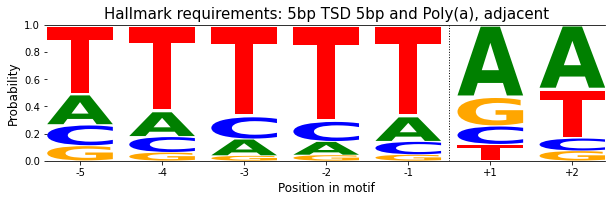

          A         T         C         G
0  0.222689  0.527311  0.153361  0.096639
1  0.168067  0.684874  0.098739  0.048319
2  0.094538  0.710084  0.165966  0.029412
3  0.065126  0.773109  0.138655  0.023109
4  0.189076  0.693277  0.088235  0.029412
5  0.567227  0.107143  0.117647  0.207983
6  0.516807  0.350840  0.073529  0.058824
476


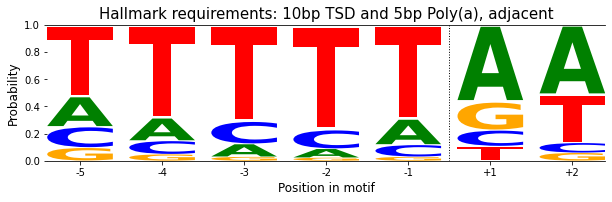

In [7]:
samples = ['mischka','mCanLor1.2','nala','china','sandy','tasha','yella','wags','zoey']
for sample in samples:
    import_file = f"/home/blacksmi/links/kidd-lab/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Scale_Up_2024_04_24/{sample}/Retrogene_Output_dist_60.txt"
    generate_logoplot(import_file,sample)
    generate_logoplot(import_file,sample,["Long_TSD"])
    generate_logoplot(import_file,sample,["Both_Hallmarks"])
    generate_logoplot(import_file,sample,["Long_TSD","Both_Hallmarks"])
    generate_logoplot(import_file,sample,["Agree"])
    generate_logoplot(import_file,sample,["Agree","Long_TSD"])

          A         T         C         G
0  0.227273  0.530303  0.166667  0.075758
1  0.166667  0.621212  0.151515  0.060606
2  0.151515  0.666667  0.166667  0.015152
3  0.106061  0.681818  0.181818  0.030303
4  0.287879  0.500000  0.121212  0.090909
5  0.590909  0.121212  0.090909  0.196970
6  0.560606  0.318182  0.060606  0.060606
66


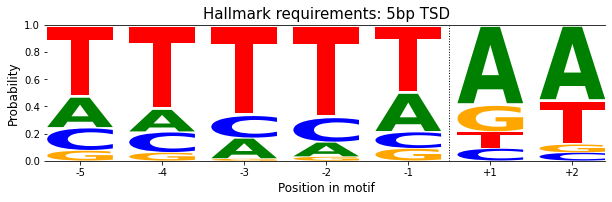

          A         T         C         G
0  0.191489  0.553191  0.170213  0.085106
1  0.170213  0.702128  0.106383  0.021277
2  0.085106  0.787234  0.127660  0.000000
3  0.021277  0.808511  0.170213  0.000000
4  0.276596  0.553191  0.127660  0.042553
5  0.638298  0.063830  0.085106  0.212766
6  0.638298  0.319149  0.042553  0.000000
47


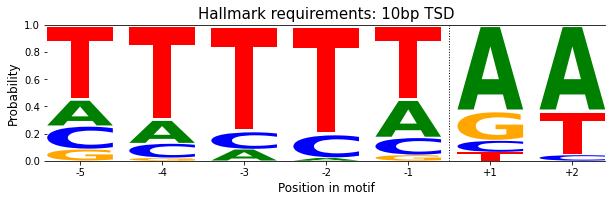

          A         T         C         G
0  0.195652  0.565217  0.173913  0.065217
1  0.152174  0.695652  0.130435  0.021739
2  0.086957  0.760870  0.152174  0.000000
3  0.043478  0.760870  0.195652  0.000000
4  0.304348  0.500000  0.152174  0.043478
5  0.630435  0.043478  0.065217  0.260870
6  0.630435  0.304348  0.043478  0.021739
46


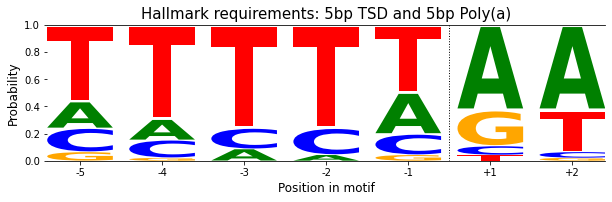

          A         T         C         G
0  0.166667  0.571429  0.190476  0.071429
1  0.166667  0.714286  0.119048  0.000000
2  0.095238  0.785714  0.119048  0.000000
3  0.023810  0.809524  0.166667  0.000000
4  0.309524  0.523810  0.119048  0.047619
5  0.642857  0.047619  0.071429  0.238095
6  0.642857  0.309524  0.047619  0.000000
42


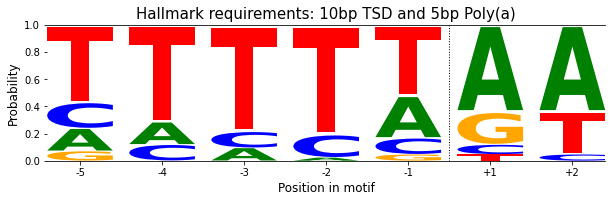

          A         T         C         G
0  0.173913  0.608696  0.130435  0.086957
1  0.217391  0.652174  0.130435  0.000000
2  0.086957  0.782609  0.130435  0.000000
3  0.000000  0.869565  0.130435  0.000000
4  0.304348  0.608696  0.043478  0.043478
5  0.652174  0.086957  0.086957  0.173913
6  0.565217  0.391304  0.043478  0.000000
23


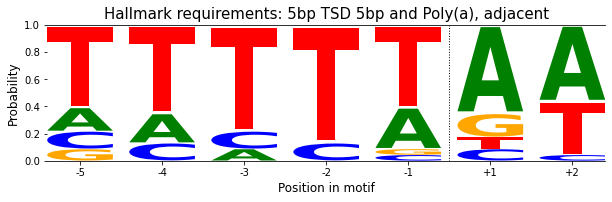

          A         T         C         G
0  0.173913  0.608696  0.130435  0.086957
1  0.217391  0.652174  0.130435  0.000000
2  0.086957  0.782609  0.130435  0.000000
3  0.000000  0.869565  0.130435  0.000000
4  0.304348  0.608696  0.043478  0.043478
5  0.652174  0.086957  0.086957  0.173913
6  0.565217  0.391304  0.043478  0.000000
23


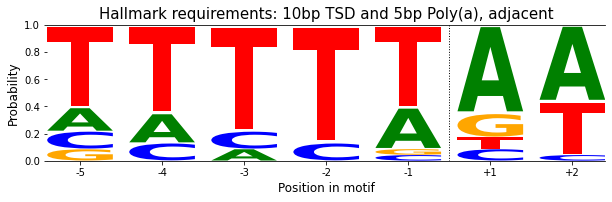

In [8]:
sample = 'mischka_Full_ORF'
import_file = "/home/blacksmi/links/kidd-lab/matt-projects/Stuff_For_Anthony/Identify_Hallmarks_From_Retrogenes/Full_ORF_Loci/mischka_Retrogene_Output_dist_60.txt"
generate_logoplot(import_file,sample)
generate_logoplot(import_file,sample,["Long_TSD"])
generate_logoplot(import_file,sample,["Both_Hallmarks"])
generate_logoplot(import_file,sample,["Long_TSD","Both_Hallmarks"])
generate_logoplot(import_file,sample,["Agree"])
generate_logoplot(import_file,sample,["Agree","Long_TSD"])